# A pretrained network that recognizes the subject of an image

We will equip ourselves with a network trained on ImageNet. To do so, we’ll take a look at the TorchVision project (https://github.com/pytorch/vision), which contains a few of the best-performing neural network architectures for computer vision, such as AlexNet (http://mng.bz/lo6z), ResNet (https://arxiv.org/pdf/ 1512.03385.pdf), and Inception v3 (https://arxiv.org/pdf/1512.00567.pdf).

Using the resnet101 function, we’ll now instantiate a 101-layer convolutional neural network. Just to put things in perspective, before the advent of residual networks in 2015, achieving stable training at such depths was considered extremely hard. Residual networks pulled a trick that made it possible, and by doing so, beat several benchmarks in one sweep that year.

Let’s create an instance of the network now. We’ll pass an argument that will instruct the function to download the weights of resnet101 trained on the ImageNet dataset, with 1.2 million images and 1,000 categories:

In [ ]:
import torch
resnet = models.resnet101(pretrained=True)

/opt/conda/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


100%|██████████| 171M/171M [00:35<00:00, 4.98MB/s] 


In [6]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

We define a preprocess function that will scale the input image to 256 × 256, crop the image to 224 × 224 around the center, transform it to a tensor (a PyTorch multidimensional array: in this case, a 3D array with color, height, and width), and normalize its RGB (red, green, blue) components so that they have defined means and standard deviations. These need to match what was presented to the network during training:

In [7]:
from torchvision import transforms
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )])

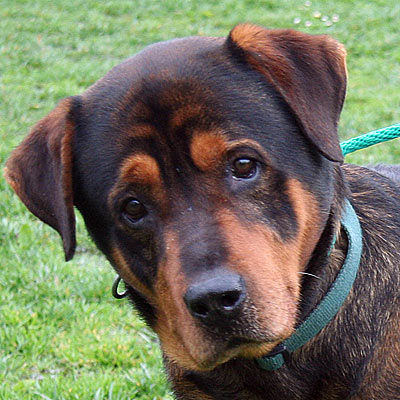

In [8]:
from PIL import Image
img = Image.open("/usr/workspace/media/67.jpg")
img

Next, we can pass the image through our preprocessing pipeline. Then we can reshape, crop, and normalize the input tensor in a way that the network expects.

In [9]:
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)

The process of running a trained model on new data is called inference in deep learning circles. In order to do inference, we need to put the network in eval mode:

In [10]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [11]:
out = resnet(batch_t)
out

tensor([[ 1.2975e+00, -1.9950e+00, -8.3677e-01, -2.1849e+00, -1.4437e+00,
         -8.2097e-01,  8.8170e-01, -1.3308e+00, -2.4733e+00, -3.4978e+00,
         -1.3274e+00, -9.6375e-01, -1.2525e+00, -1.2171e+00,  1.1759e+00,
         -2.4130e+00, -4.4302e+00, -2.4423e-01, -5.4107e-01, -3.3202e+00,
         -2.9811e+00, -2.0738e+00, -2.7010e+00, -3.3302e+00, -1.7342e+00,
          8.7212e-01, -1.3424e+00, -8.7858e-01,  1.0504e+00, -3.9730e+00,
         -8.5077e-01, -2.0415e+00, -1.8952e+00, -8.7341e-01, -3.0163e-01,
          8.6710e-01, -9.2521e-01,  1.8749e+00, -2.7395e+00, -1.4856e+00,
         -1.9516e+00, -2.9304e+00, -2.0772e+00, -3.1765e+00, -2.8979e+00,
         -1.5308e+00, -1.0351e+00, -2.3047e+00, -2.5940e+00, -2.1706e+00,
         -1.0521e+00, -1.8686e+00,  3.2836e-01,  1.2208e-01, -2.1810e+00,
          8.4955e-01, -1.3803e+00, -2.7894e-01, -5.0512e-01, -6.1647e-01,
          9.0333e-01,  3.3301e-01, -1.8486e-01, -1.3679e+00,  9.6308e-02,
          8.4887e-01, -2.5182e+00, -3.

A staggering set of operations involving 171 million parameters has just happened, producing a vector of 1,000 scores, one per ImageNet class.

We now need to find out the label of the class that received the highest score. This will tell us what the model saw in the image. Let’s load the file containing the 1,000 labels for the ImageNet dataset classes:


In [14]:
with open('/usr/workspace/media/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

We need to determine the index corresponding to the maximum score in the out tensor we obtained previously.

In [15]:
_, index = torch.max(out, 1)

We can now use the index to access the label. Here, index is not a plain Python number, but a one-element, one-dimensional tensor, so we need to get the actual numerical value to use as an index into our labels list using index[0]. We also use torch.nn.functional.softmax (http://mng.bz/BYnq) to normalize our outputs to the range [0, 1], and divide by the sum. That gives us something roughly akin to the confidence that the model has in its prediction. In this case, the model is 81.6% certain that it knows what it’s looking at is a Rottweiler:

In [16]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('234, Rottweiler', 81.58592224121094)

Since the model produced scores, we can also find out what the second best, third best, and so on were.

In [17]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('234, Rottweiler', 81.58592224121094),
 ('236, Doberman', 3.5861876010894775),
 ('165, black-and-tan_coonhound', 3.520589590072632),
 ('168, redbone', 1.548637866973877),
 ('238, Greater_Swiss_Mountain_dog', 1.4531604051589966)]